<a href="https://colab.research.google.com/github/shxdabb/ML-Lab/blob/main/Practical_3_mllab_180725.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [22]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
housing = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Target'] = housing.target  # Median House Value

# View the data
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [23]:
print(df.isnull().values.any())

False


In [24]:
# Check how many null values in each column
print(df.isnull().sum())



MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


In [25]:


df.loc[0:5, 'MedInc'] = np.nan
df.loc[10:12, 'AveRooms'] = np.nan
df.loc[20, 'HouseAge'] = np.nan




In [26]:
# Check if they are added
print(df.isnull().sum())

MedInc        6
HouseAge      1
AveRooms      3
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


In [27]:
df['MedInc'].describe()

,MedInc
count,20634.000000
mean,3.869983
std,1.899408
min,0.499900
25%,2.562500
50%,3.534300
75%,4.742600
max,15.000100


In [28]:
# 1️⃣ Fill 'MedInc' using MEAN
df['MedInc'] = df['MedInc'].fillna(df['MedInc'].mean())

# 2️⃣ Fill 'AveRooms' using MEDIAN
df['AveRooms'] = df['AveRooms'].fillna(df['AveRooms'].median())

# 3️⃣ Fill 'HouseAge' using MODE
df['HouseAge'] = df['HouseAge'].fillna(df['HouseAge'].mode()[0])

# 4️⃣ Optional: Check again for any remaining null values
print("\nNull values after filling:\n")
print(df.isnull().sum())



Null values after filling:

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


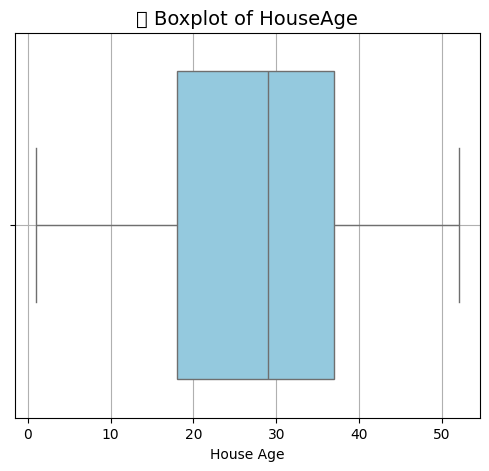

In [29]:
# Boxplot for HouseAge
plt.figure(figsize=(6, 5))
sns.boxplot(x=df['HouseAge'], color='skyblue')

plt.title('📊 Boxplot of HouseAge', fontsize=14)
plt.xlabel('House Age')
plt.grid(True)
plt.show()

In [30]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.869983,28.640068,5.429005,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899131,12.586360,2.474170,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229091,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.742300,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [31]:
df['HouseAge'].describe()

,HouseAge
count,20640.000000
mean,28.640068
std,12.586360
min,1.000000
25%,18.000000
50%,29.000000
75%,37.000000
max,52.000000


In [32]:
print(df['HouseAge'])

0        41.0
1        21.0
2        52.0
3        52.0
4        52.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: HouseAge, Length: 20640, dtype: float64


In [33]:
Q1 = df['HouseAge'].quantile(0.25)
Q3 = df['HouseAge'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['HouseAge'] < lower_bound) | (df['HouseAge'] > upper_bound)]


print("Number of outliers in HouseAge:", outliers.shape[0])


Number of outliers in HouseAge: 0


In [36]:
#Apply Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['HouseAge'] = le.fit_transform(df['HouseAge'])
print(df['HouseAge'])

0        40
1        20
2        51
3        51
4        51
         ..
20635    24
20636    17
20637    16
20638    17
20639    15
Name: HouseAge, Length: 20640, dtype: int64


In [35]:
print(df.dtypes)

MedInc        float64
HouseAge        int64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Target        float64
dtype: object
